In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')

from summary_features.calculate_summary_features import calculate_summary_stats, calculate_summary_statistics_alternative

import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

In [2]:
## defining neuronal network model

from utils.simulation_wrapper import event_seed, set_network_default

net = set_network_default()

In [3]:
net._params

{
    "L2Basket_Gauss_A_weight": 0.0,
    "L2Basket_Gauss_mu": 2000.0,
    "L2Basket_Gauss_sigma": 3.6,
    "L2Basket_Pois_A_weight_ampa": 0.0,
    "L2Basket_Pois_A_weight_nmda": 0.0,
    "L2Basket_Pois_lamtha": 0.0,
    "L2Pyr_Gauss_A_weight": 0.0,
    "L2Pyr_Gauss_mu": 2000.0,
    "L2Pyr_Gauss_sigma": 3.6,
    "L2Pyr_Pois_A_weight_ampa": 0.0,
    "L2Pyr_Pois_A_weight_nmda": 0.0,
    "L2Pyr_Pois_lamtha": 0.0,
    "L2Pyr_ampa_e": 0.0,
    "L2Pyr_ampa_tau1": 0.5,
    "L2Pyr_ampa_tau2": 5.0,
    "L2Pyr_apical1_L": 306.0,
    "L2Pyr_apical1_diam": 4.08,
    "L2Pyr_apicaloblique_L": 340.0,
    "L2Pyr_apicaloblique_diam": 3.91,
    "L2Pyr_apicaltrunk_L": 59.5,
    "L2Pyr_apicaltrunk_diam": 4.25,
    "L2Pyr_apicaltuft_L": 238.0,
    "L2Pyr_apicaltuft_diam": 3.4,
    "L2Pyr_basal1_L": 85.0,
    "L2Pyr_basal1_diam": 4.25,
    "L2Pyr_basal2_L": 255.0,
    "L2Pyr_basal2_diam": 2.72,
    "L2Pyr_basal3_L": 255.0,
    "L2Pyr_basal3_diam": 2.72,
    "L2Pyr_dend_Ra": 200.0,
    "L2Pyr_dend_cm": 0.619

In [4]:
window_len = 30
prior_min = [43.8, 89.49]   # 't_evdist_1', 'sigma_t_evdist_1', 't_evprox_2', 'sigma_t_evprox_2'

prior_max = [79.9, 152.96]  

prior = utils.torchutils.BoxUniform(low=prior_min, 
                                    high=prior_max)

number_simulations = 3
density_estimator = 'nsf'

In [8]:
from utils import inference
from utils.simulation_wrapper import event_seed, simulation_wrapper

posterior, theta, x = inference.run_sim_inference(prior, simulation_wrapper, number_simulations, density_estimator=density_estimator)

window_len, scaling_factor = 30, 3000



joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/kathi/anaconda3/lib/python3.8/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


Running 3 simulations.:   0%|          | 0/3 [00:00<?, ?it/s]

joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Sim

In [9]:
window_len, scaling_factor = 30, 3000



param_real = torch.tensor([[ 63.53, 137.12]])
s_real = inference.run_only_sim(param_real)


joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


In [10]:
print(s_real)

[tensor([ 4.0661e+00, -4.1023e+01,  7.1557e+01,  9.5900e+02,  2.5500e+03,
         3.5620e+03,  0.0000e+00,  2.6999e+01, -8.0020e+01,  1.3526e+03,
         0.0000e+00,  1.1062e+03,  1.6815e+04,  2.3431e+06,  0.0000e+00,
         1.3880e+03, -2.1480e+04,  3.1194e+06], dtype=torch.float64)]


In [41]:
samples = posterior.sample((100,), 
                           x=s_real[0])

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
samples

tensor([[ 59.4349, 127.9598],
        [ 48.1744, 124.2662],
        [ 70.5571, 105.0779],
        [ 47.3946, 123.6945],
        [ 73.4102, 119.6194],
        [ 78.9283, 114.0164],
        [ 76.6430,  98.6615],
        [ 50.2988, 104.8125],
        [ 55.3129,  98.9770],
        [ 62.4300, 108.6208],
        [ 69.3327, 135.7372],
        [ 55.5136, 113.5966],
        [ 72.3761, 107.9121],
        [ 75.4666, 112.6256],
        [ 68.6756,  91.7189],
        [ 63.5287, 104.1289],
        [ 61.3754,  91.4349],
        [ 68.7527, 125.8794],
        [ 57.8516, 109.3435],
        [ 71.5290, 105.3242],
        [ 60.2118, 112.4489],
        [ 69.3955, 114.1761],
        [ 72.9188, 102.4377],
        [ 47.6116, 105.2127],
        [ 51.3989, 111.1953],
        [ 68.7088, 100.1750],
        [ 69.2957, 109.8476],
        [ 48.1806, 113.7490],
        [ 68.9486, 106.2945],
        [ 51.4335,  98.3808],
        [ 45.8922, 115.0971],
        [ 63.8441, 110.3273],
        [ 76.8513,  99.3600],
        [ 

In [43]:
s_x = inference.run_only_sim(samples)

joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Sim

Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Don

Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Sim

Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms..

Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Sim

Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
jo

Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...

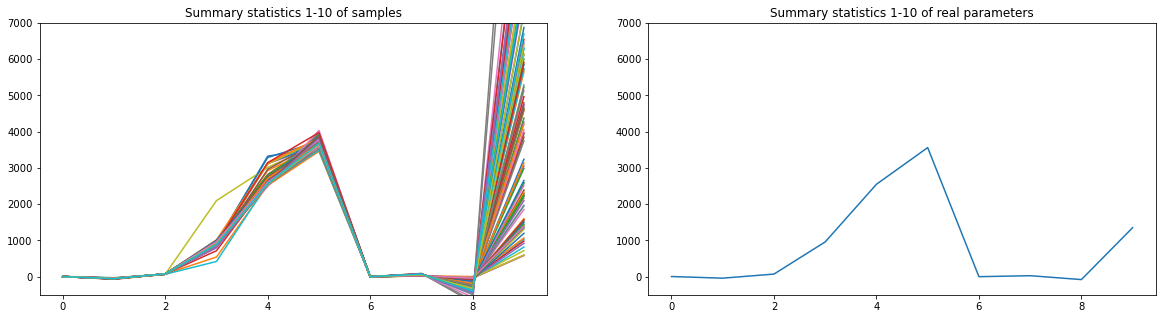

In [44]:
import seaborn as sns
import matplotlib.gridspec as gridspec




fig = plt.figure(figsize=(20,5))

gs = gridspec.GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for sample in s_x:
    
    #assert torch.equal(sample, s_real[0])
    ax0.plot(sample.detach().numpy()[:10])
    ax0.set_title('Summary statistics 1-10 of samples')
    ax0.set(ylim=(-500, 7000))
 

ax1.plot(s_real[0][:10])
ax1.set_title('Summary statistics 1-10 of real parameters')
ax1.set(ylim=(-500, 7000))

plt.savefig('summary_stats1')

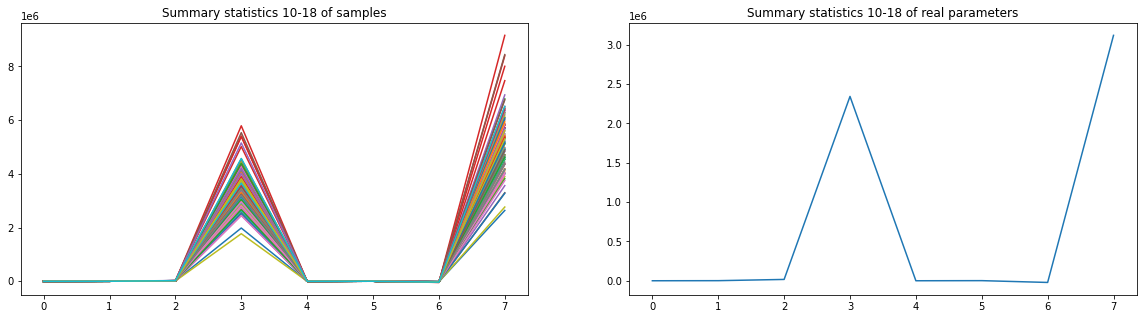

In [45]:
fig = plt.figure(figsize=(20,5))

gs = gridspec.GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for sample in s_x:
    
    #assert torch.equal(sample, s_real[0])
    ax0.plot(sample.detach().numpy()[10:])
    ax0.set_title('Summary statistics 10-18 of samples')
    #ax0.set(ylim=(-500, 7000))
 

ax1.plot(s_real[0][10:])
ax1.set_title('Summary statistics 10-18 of real parameters')
#ax1.set(ylim=(-500, 7000))
  
plt.savefig('summary_stats2')

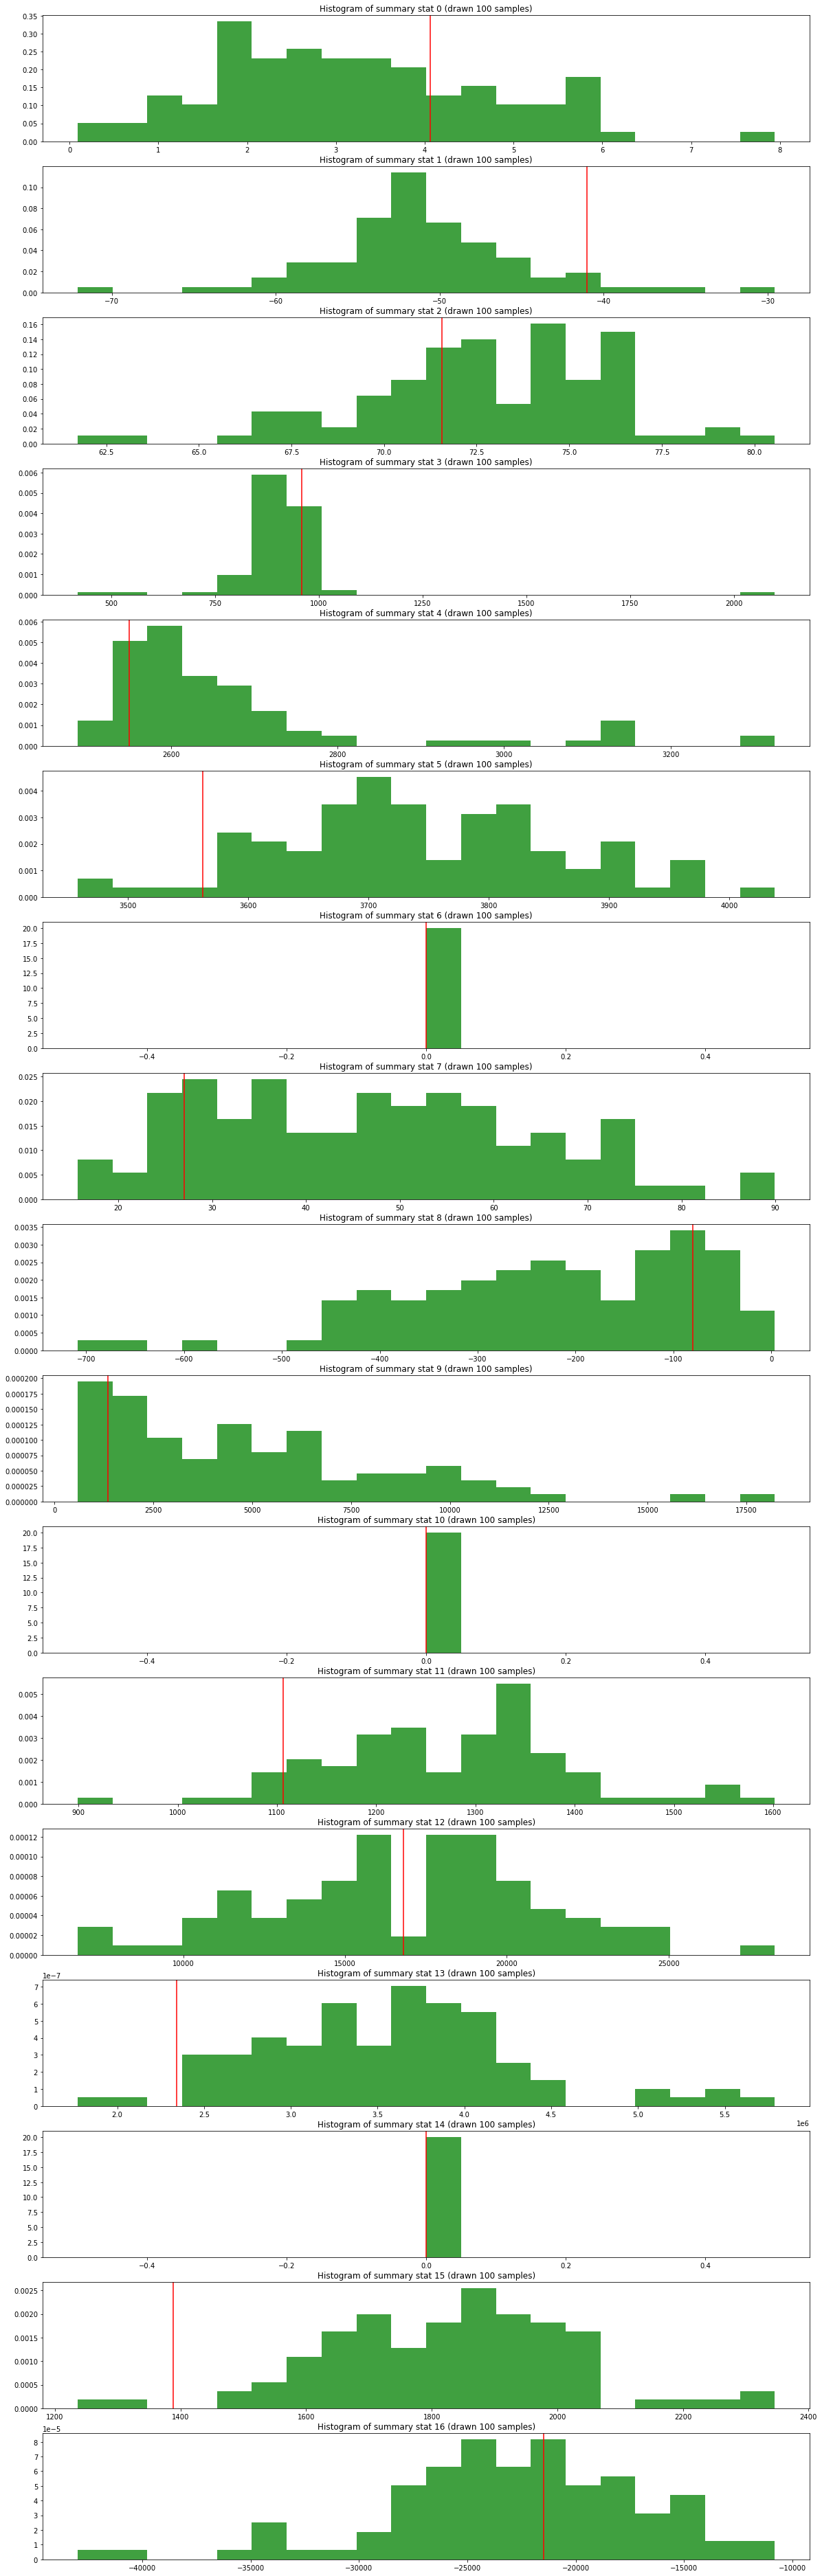

In [50]:
import math
import numpy as np

fig = plt.figure(figsize=(20,400))

gs = gridspec.GridSpec(nrows=len(s_x)-1, ncols=1)




for i in range(len(s_x[0])-1):
    
    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []

    for j in range(len(s_x)-1):
        globals()['sum_stats%s' % i].append(s_x[j][i])



    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i], bins=20, density=True, facecolor='g', alpha=0.75, histtype='barstacked')
    globals()['ax%s' % i].set_title('Histogram of summary stat {} (drawn 100 samples)'.format(i))
    #ax0.set(ylim=(-500, 7000))


    globals()['ax%s' % i].axvline(s_real[0][i], color='red')




plt.savefig('Histograms.png')


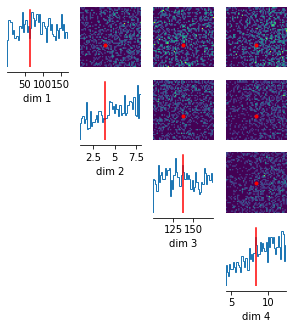

In [14]:
true_params = torch.Tensor([63.53, 3.85, 137.12, 8.33])




fig, axes = analysis.pairplot(samples,
                           #limits=[[.5,80], [1e-4,15.]],
                           #ticks=[[.5,80], [1e-4,15.]],
                           figsize=(5,5),
                           points=true_params,
                           points_offdiag={'markersize': 6},
                           points_colors='r');

In [81]:
%load_ext autoreload
%autoreload 2

import os


os.chdir('/home/kathi/Documents/Master_thesis/code/eeg_sbi')
from dataloads_storage import write_to_file

file_writer = write_to_file.WriteToFile(experiment='ERP_results')

file_writer.save_posterior(posterior)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/kathi/Documents/Master_thesis/code/eeg_sbi
/home/kathi/Documents/Master_thesis/code/eeg_sbi


In [83]:
print(file_writer.date)

posterior =torch.load('results/{}{}/posterior.pt'.format(file_writer.experiment, file_writer.date))



10-29-2021_23:17:39


In [ ]:
import sys, os, datetime

path_parent = os.path.dirname(os.getcwd())
fig.savefig(str(path_parent)+'/eeg_sbi/results/fig_result_'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S")+'.pdf')

path_parent = os.path.dirname(os.getcwd())

def create_file(file_name):
    print(path_parent)
    os.chdir(str(path_parent)+'/eeg_sbi/results')
    os.system('touch ' + file_name)
   
 
create_file('metadata'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S"))

def write_data_in_file(file_name):
    os.chdir(str(path_parent)+'/eeg_sbi/results')
    
    with open(file_name, 'w') as fd:
        fd.write('#' * ( 16)) 
        fd.write('\n# parameters: ' + 't_evdist_1, sigma_t_evdist_1, t_evprox_2, sigma_t_evprox_2')
        fd.write('\n# priors: ' + str(prior))
        fd.write('\n# number of simulations: ' + str(number_simulations))
        fd.write('\n# posterior: ' + str(posterior))
        fd.write('\n# true parameters: ' + str(true_params))
        fd.write('\n# Created at: ' + datetime.datetime.today().strftime('%d %b %Y') + '\n')
        fd.write('#' * (16))

        
        os.chdir(path_parent)


write_data_in_file('metadata'+datetime.datetime.now().strftime("%m%d%Y_%H:%M:%S"))